In [ ]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("exp5.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

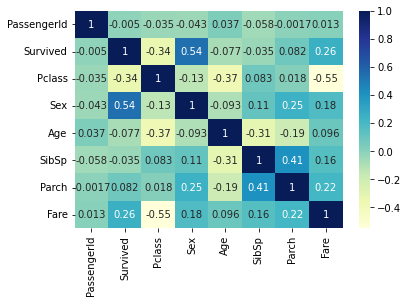

In [ ]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sb.set(rc = {'figure.figsize':(15,8)})

In [ ]:
print("The best 3 attributes correlated to output label are: SEX, PCLASS AND FARE ")

The best 3 attributes correlated to output label are: SEX, PCLASS AND FARE 


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Age'],axis='columns',inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Fare
0,0,3,0,7.2500
1,1,1,1,71.2833
2,1,3,1,7.9250
3,1,1,1,53.1000
4,0,3,0,8.0500
...,...,...,...,...
886,0,2,0,13.0000
887,1,1,1,30.0000
888,0,3,1,23.4500
889,1,1,0,30.0000


In [ ]:
inputs = df.drop('Survived',axis='columns')
inputs

,Pclass,Sex,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500
...,...,...,...
886,2,0,13.0000
887,1,1,30.0000
888,3,1,23.4500
889,1,0,30.0000


In [ ]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
print(X_train)
print(y_train)

     Pclass  Sex     Fare
771       3    0   7.8542
746       3    0  20.2500
833       3    0   7.8542
786       3    1   7.4958
365       3    0   7.2500
..      ...  ...      ...
131       3    0   7.0500
652       3    0   8.4333
33        2    0  10.5000
235       3    1   7.5500
366       1    1  75.2500

[623 rows x 3 columns]
771    0
746    0
833    0
786    1
365    0
      ..
131    0
652    0
33     0
235    0
366    1
Name: Survived, Length: 623, dtype: int64


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#Diff support vector attribute
classifier.support_vectors_

array([[  3.    ,   0.    ,   7.8542],
       [  3.    ,   0.    ,   7.8542],
       [  1.    ,   0.    ,   0.    ],
       [  3.    ,   0.    ,   7.775 ],
       [  3.    ,   1.    ,  15.2458],
       [  1.    ,   0.    ,  30.6958],
       [  2.    ,   0.    ,   0.    ],
       [  1.    ,   0.    ,  77.2875],
       [  3.    ,   1.    ,   9.825 ],
       [  3.    ,   1.    ,   8.05  ],
       [  3.    ,   1.    ,  31.275 ],
       [  2.    ,   0.    ,  13.    ],
       [  1.    ,   0.    ,  83.475 ],
       [  3.    ,   1.    ,  10.4625],
       [  1.    ,   0.    ,  51.8625],
       [  2.    ,   0.    ,  26.    ],
       [  3.    ,   1.    ,  31.275 ],
       [  2.    ,   0.    ,  15.05  ],
       [  1.    ,   0.    ,  79.65  ],
       [  2.    ,   0.    ,  26.    ],
       [  3.    ,   1.    ,  15.2458],
       [  2.    ,   0.    ,  13.    ],
       [  3.    ,   1.    ,   7.6292],
       [  3.    ,   1.    ,  69.55  ],
       [  1.    ,   0.    , 263.    ],
       [  2.    ,   0.   

In [ ]:
classifier.n_support_

array([145, 148], dtype=int32)

In [ ]:
classifier.support_

array([  0,   2,  11,  14,  37,  38,  44,  47,  50,  53,  62,  69,  78,
        81,  85,  97, 102, 105, 107, 109, 116, 118, 132, 147, 149, 151,
       157, 161, 166, 169, 171, 173, 174, 177, 185, 189, 196, 197, 198,
       199, 201, 206, 208, 211, 221, 222, 225, 226, 229, 232, 235, 241,
       246, 248, 253, 256, 257, 263, 267, 272, 275, 276, 278, 286, 293,
       303, 304, 305, 306, 317, 322, 323, 334, 338, 339, 341, 345, 352,
       353, 354, 356, 359, 361, 370, 376, 377, 378, 385, 404, 406, 410,
       412, 419, 422, 423, 424, 428, 433, 440, 445, 452, 456, 457, 460,
       462, 465, 466, 475, 476, 489, 490, 493, 494, 499, 500, 505, 506,
       507, 516, 517, 519, 524, 528, 531, 533, 535, 537, 545, 547, 549,
       550, 553, 557, 560, 576, 577, 579, 582, 583, 586, 593, 594, 602,
       615, 621,   5,   8,  13,  15,  20,  23,  25,  35,  36,  40,  42,
        48,  56,  60,  61,  63,  64,  66,  68,  73,  77,  80,  84,  86,
        91,  93,  94,  96,  98, 103, 106, 108, 110, 111, 121, 12

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 
print(y_pred)

[1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0]


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print("CONFUSION MATRIX\n")
print("\t0\t1")
print("0\t%d\t%d" % (cm[0][0],cm[0][1]))
print("1\t%d\t%d" % (cm[1][0],cm[1][1]))

CONFUSION MATRIX

	0	1
0	147	23
1	26	72


In [ ]:
#verifying the confusion matrix
lst = y_test.tolist()

tp=tn=fp=fn=0
for i in range(268):
  if(lst[i]==1 and y_pred[i]==1):
    tp+=1
  elif(lst[i]==0 and y_pred[i]==0):
    tn+=1
  elif(lst[i]==1 and y_pred[i]==0):
    fn+=1
  else:
    fp+=1
  
print(tp,tn,fp,fn)

72 147 23 26


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)

precision_positive = precision_score(y_test, y_pred, pos_label=1)
precision_negative = precision_score(y_test, y_pred, pos_label=0)
 

recall_sensitivity = recall_score(y_test, y_pred,pos_label=1)
recall_specificity = recall_score(y_test, y_pred, pos_label=0)
 

print("ACCURACY =",accuracy) 
print("PRECISION POSITIVE =",precision_positive)
print("PRECISION NEGATIVE =",precision_negative)
print("RECALL SENSITIVITY =",recall_sensitivity)
print("RECALL SPECIFICITY =",recall_specificity)

ACCURACY = 0.8171641791044776
PRECISION POSITIVE = 0.7578947368421053
PRECISION NEGATIVE = 0.8497109826589595
RECALL SENSITIVITY = 0.7346938775510204
RECALL SPECIFICITY = 0.8647058823529412
